## This notebook implements Example 8.3 from the Basic Econometrics textbook (Gujarati, 5th ed.).

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
os.chdir(os.path.abspath('') + '/econometrics-practice-with-python/')
dataset = pd.read_excel('datasets/Table 8_8.xls')
print(dataset)

    YEAR     GDP  Employment  CAPITAL
0   1955  114043        8310   182113
1   1956  120410        8529   193749
2   1957  129187        8738   205192
3   1958  134705        8952   215130
4   1959  139960        9171   225021
5   1960  150511        9569   237026
6   1961  157897        9527   248897
7   1962  165286        9662   260661
8   1963  178491       10334   275466
9   1964  199457       10981   295378
10  1965  212323       11746   315715
11  1966  226977       11521   337642
12  1967  241194       11540   363599
13  1968  260881       12066   391847
14  1969  277498       12297   422382
15  1970  296530       12955   455049
16  1971  306712       13338   484677
17  1972  329030       13738   520553
18  1973  354057       15924   561531
19  1974  374977       14154   609825


### Fitting the model with Scikit Learning

In [10]:
skModel = LinearRegression().fit(np.log(dataset[['Employment', 'CAPITAL']]), np.log(dataset['GDP']))

print("Scikit Learning R²: " + str(skModel.score(np.log(dataset[['Employment', 'CAPITAL']]), np.log(dataset['GDP']))))
print("Scikit Learning intercept: " + str(skModel.intercept_))
print("Scikit Learning slope (log(Employment), log(CAPITAL)): " + str(skModel.coef_))

Scikit Learning R²: 0.995080252813614
Scikit Learning intercept: -1.6524193926853048
Scikit Learning slope (log(Employment), log(CAPITAL)): [0.33973232 0.84599726]


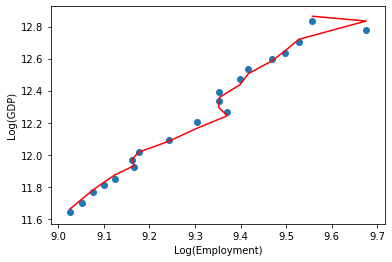

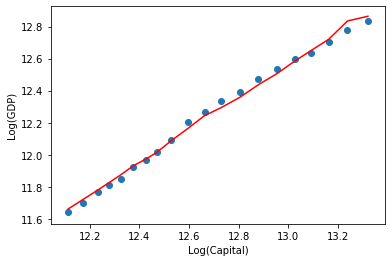

In [13]:
plt.scatter(np.log(dataset['Employment']), np.log(dataset['GDP']))
plt.plot(np.log(dataset['Employment']), skModel.predict(np.log(dataset[['Employment', 'CAPITAL']])), color='red')
plt.xlabel('Log(Employment)')
plt.ylabel('Log(GDP)')
plt.show()

plt.scatter(np.log(dataset['CAPITAL']), np.log(dataset['GDP']))
plt.plot(np.log(dataset['CAPITAL']), skModel.predict(np.log(dataset[['Employment', 'CAPITAL']])), color='red')
plt.xlabel('Log(Capital)')
plt.ylabel('Log(GDP)')
plt.show()

### Fitting the model with statsmodel

In [28]:
smDataset = dataset.assign(const=np.exp(1))
smModel = sm.OLS(np.log(smDataset['GDP']), np.log(smDataset[['const', 'Employment', 'CAPITAL']]))
smFittedModel = smModel.fit()
smFittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1719.
Date:                Wed, 13 May 2020   Prob (F-statistic):           2.41e-20
Time:                        20:35:08   Log-Likelihood:                 44.552
No. Observations:                  20   AIC:                            -83.10
Df Residuals:                      17   BIC:                            -80.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6524      0.606     -2.726      0.014      -2.931      -0.373
Employment     0.3397      0.186      1.830      0.085      -0.052       0.732
CAPITAL        0.8460      0.093      9.062      0.000       0.649       1.043
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.438
Skew:                          -0.037   Prob(JB):                        0.803
Kurtosis:                       2.279   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""